In [1]:
import os
import numpy as np
import pickle
import torch
import pandas as pd

from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from tqdm import tqdmT

In [2]:
sonar_samples = pd.read_table('../simpylc/default.samples', sep = " ", header=None)

In [4]:
sonar_samples.head()

,0,1,2,3
0,1.4140,1.2382,1.7471,-22.0
1,1.4140,1.2382,1.7471,-22.0
2,1.4123,1.2368,1.7460,-22.0
3,1.4103,1.2352,1.7446,-22.0
4,1.4103,1.2352,1.7446,-22.0


In [23]:
print(sonar_samples.shape)
print(1593/10)

(1593, 4)
159.3


In [5]:
X_sonar = torch.Tensor(sonar_samples.iloc[:, :-1].to_numpy())
Y_sonar = torch.Tensor(sonar_samples.iloc[:, -1:].to_numpy())

In [35]:
loader = DataLoader(list(zip(X_sonar, Y_sonar)), shuffle = True, batch_size = 25)

for x, y in loader:
    print(x,y)

tensor([[1.7394, 1.6899, 1.1211],
        [2.1320, 1.1700, 1.4223],
        [1.6451, 1.5201, 0.9033],
        [1.9563, 1.7459, 0.8793],
        [1.6430, 1.5820, 1.0454],
        [1.7572, 1.4729, 0.7673],
        [2.0697, 1.7843, 0.8184],
        [1.7103, 1.1914, 1.3545],
        [2.4304, 1.7179, 0.8139],
        [1.4328, 1.9180, 0.8832],
        [2.2308, 0.8863, 1.2925],
        [2.1518, 1.7448, 1.0610],
        [2.6790, 1.2600, 0.9938],
        [2.1162, 1.6233, 1.1595],
        [1.8127, 1.5458, 1.0708],
        [2.2917, 1.7807, 1.0995],
        [1.9953, 1.7035, 1.1412],
        [2.2782, 1.1679, 1.2417],
        [1.4454, 1.2029, 1.3797],
        [1.6022, 1.2656, 1.1126],
        [1.8757, 1.7098, 0.8169],
        [1.6910, 0.9016, 1.4445],
        [1.6934, 1.1317, 1.2560],
        [2.2537, 1.5738, 0.9933],
        [1.3760, 1.3501, 1.1648]]) tensor([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [22.],

In [70]:
class Sonar_sweep(nn.Module):

    def __init__(self, input_size, hidden1_size, hidden2_size, output_size): #hidden1_size, hidden2_size, output_size):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden1_size)
        self.activ1 = nn.ReLU()
        self.l2 = nn.Linear(hidden1_size, hidden2_size)
        self.activ2 = nn.ReLU()
        self.l3 = nn.Linear(hidden2_size, output_size)

    def forward(self, X):
        X = self.l1(X)
        X = self.activ1(X)
        X = self.l2(X)
        X = self.activ2(X)
        X = self.l3(X)
        
        return X

In [79]:
model_s = Sonar_sweep(3, 64, 32, 1)

learning_rate = 0.0001
loss_function = nn.MSELoss()

grad_desc = torch.optim.SGD(model_s.parameters(), lr=learning_rate)

epochs = 3000
losses = []

model_s.train()

for i in tqdm(range(epochs)):
    epoch_loss = []
    
    for x_b, y_b in loader:
        grad_desc.zero_grad()
        y_pred = model_s(x_b)
        loss = loss_function(y_pred, y_b)
        loss.backward()
        grad_desc.step()
        epoch_loss.append(loss.item())

    losses.append(sum(epoch_loss)/len(loader))
    #print(losses)

100%|██████████████████████████████████████| 3000/3000 [00:23<00:00, 125.35it/s]


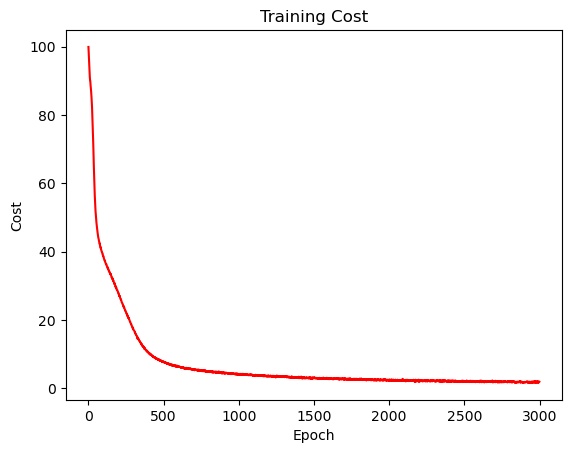

In [80]:
fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(len(losses))], losses, 'red')
plt.show()

In [81]:
print(losses[-1])

1.8928453806183825
